<a href="https://colab.research.google.com/github/mbparsons/code/blob/master/Travel_Pony_Ad_Cost_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

import sklearn as sk
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LassoCV, LarsCV, LassoLarsCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pony = 'drive/My Drive/Colab Notebooks/Travel Pony Facebook.csv'
df = pd.read_csv(pony)

In [0]:
data = df[df['Amount Spent (USD)'] != 0]
data

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,2013-12-02,2013-12-02,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,2013-12-01,2013-12-01,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,2013-11-30,2013-11-30,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,2013-11-29,2013-11-29,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,2013-11-22,2013-11-22,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,2013-06-11,2013-06-11,Bob Jackson,Ad 1,298,1.003356,299,2,1,1.05,0,1,1,1,0,0,0,0,0.00,1.050000
3701,2013-06-10,2013-06-10,Bob Jackson,Ad 1,514,1.060311,545,3,3,1.60,0,3,3,3,0,0,0,0,0.00,0.533333
3702,2013-06-09,2013-06-09,Bob Jackson,Ad 1,111,1.000000,111,1,1,0.99,0,1,1,1,0,0,0,0,0.00,0.990000
3703,2013-06-08,2013-06-08,Bob Jackson,Ad 1,143,1.000000,143,3,3,0.95,0,3,3,3,0,0,0,0,0.00,0.316667


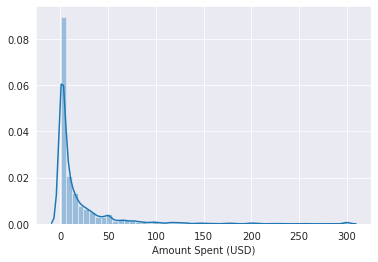

In [0]:
sns.set_style('darkgrid')
sns.distplot(data['Amount Spent (USD)'])

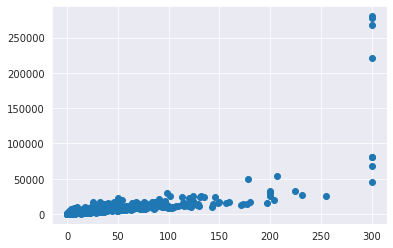

In [0]:
plt.scatter(data['Amount Spent (USD)'], data['Reach'])

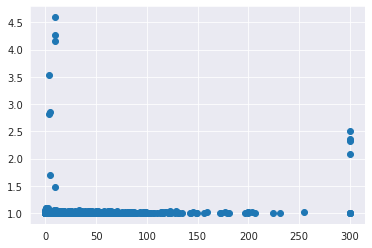

In [0]:
plt.scatter(data['Amount Spent (USD)'], data['Frequency'])

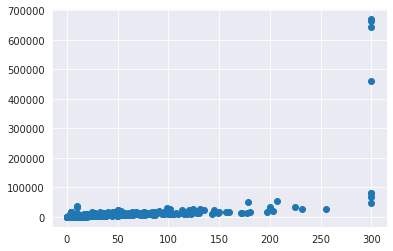

In [0]:
plt.scatter(data['Amount Spent (USD)'], data['Impressions'])

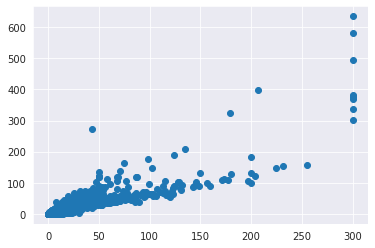

In [0]:
plt.scatter(data['Amount Spent (USD)'], data['Clicks'])

1. I see linear relationships and think linear regression will work for this problem.

In [0]:
np.unique(data['Campaign Name'])

array(['Ad 1', 'Cyber Weekend', 'Nanigans_2_637', 'Nanigans_2_638',
       'Nanigans_2_639', 'Nanigans_2_640', 'Nanigans_2_641',
       'Nanigans_2_642', 'Nanigans_2_643', 'Nanigans_2_644',
       'Nanigans_2_645', 'Nanigans_2_646', 'Nanigans_2_647',
       'Nanigans_2_648', 'Nanigans_2_651', 'Nanigans_2_652',
       'Nanigans_2_653', 'Nanigans_2_654', 'Nanigans_2_655',
       'Nanigans_2_656', 'Nanigans_2_659', 'Nanigans_2_660',
       'Nanigans_2_661', 'Nanigans_2_662', 'Nanigans_2_663',
       'Nanigans_2_664', 'Nanigans_2_669', 'Nanigans_2_670',
       'Nanigans_2_671', 'Nanigans_5_701', 'Nanigans_5_702',
       'Nanigans_5_703', 'Nanigans_5_704', 'Nanigans_5_705',
       'Nanigans_5_706', 'Nanigans_5_707', 'Nanigans_5_708',
       'Nanigans_5_709', 'Nanigans_5_710', 'Nanigans_5_711',
       'Nanigans_5_712', 'Nanigans_6_713', 'Nanigans_6_715',
       'Nanigans_6_716', 'Nanigans_6_717', 'Nanigans_6_718',
       'Nanigans_7_719', 'Nanigans_7_720', 'Nanigans_7_721',
       'Nanigans_

In [0]:
v = data[['Campaign Name', 'Reach','Frequency','Impressions', 'Clicks','Unique Clicks','Page Likes','Page Engagement','Post Engagement','Post Likes','Post Comments','Post Shares','Photo Views','Website Clicks']]
x = pd.get_dummies(v)

2. Multiple Regression:

In [0]:
y = data['Amount Spent (USD)']

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     78.55
Date:                Fri, 22 Nov 2019   Prob (F-statistic):               0.00
Time:                        06:32:58   Log-Likelihood:                -6125.9
No. Observations:                1802   AIC:                         1.304e+04
Df Residuals:                    1408   BIC:                         1.521e+04
Df Model:                         393                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================================
                                                                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------
Reach                                                                         0.0030      0.000     16.921      0.000       0.003       0.003
Frequency                                                                     7.6890      3.096      2.483      0.013       1.615      13.762
Impressions                                                                  -0.0008   8.01e-05    -10.260      0.000      -0.001      -0.001
Clicks                                                                       -0.2388      0.109     -2.185      0.029      -0.453      -0.024
Unique Clicks                                                                 0.4621      0.121      3.806      0.000       0.224       0.700
Page Likes                                                                   16.3728      8.450      1.938      0.053      -0.203      32.949
Page Engagement                                                             -14.0592      8.445     -1.665      0.096     -30.626       2.508
Post Engagement                                                              11.9816      7.040      1.702      0.089      -1.827      25.791
Post Likes                                                                    1.8197      1.413      1.288      0.198      -0.952       4.591
Post Comments                                                                 2.7753      1.479      1.877      0.061      -0.125       5.676
Post Shares                                                                   2.5140      1.445      1.740      0.082      -0.321       5.349
Photo Views                                                                   2.2671      1.410      1.608      0.108      -0.499       5.034
Website Clicks                                                                2.6055      1.410      1.848      0.065      -0.160       5.371
Campaign Name_Ad 1                                                           -8.6574      4.304     -2.012      0.044     -17.099      -0.215
Campaign Name_Cyber Weekend                                                -208.1785     25.716     -8.095      0.000    -258.624    -157.733
Campaign Name_Nanigans_2_637                                                 -6.8641      5.700     -1.204      0.229     -18.046       4.318
Campaign Name_Nanigans_2_638                                                 -6.0111      5.674     -1.059      0.290     -17.142       5.119
Campaign Name_Nanigans_2_639                                                 -7.4490      5.669     -1.314      0.189     -18.569       3.671
Campaign Name_Nanigans_2_640                                                -10.0477      5.161     -

Three predictors with the highest predictive value:

1. Page Likes 16.3728
2. Post Engagement 11.9816
3. Frequency 7.688963 
